In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

## t-SNE on ANSUR II dataset
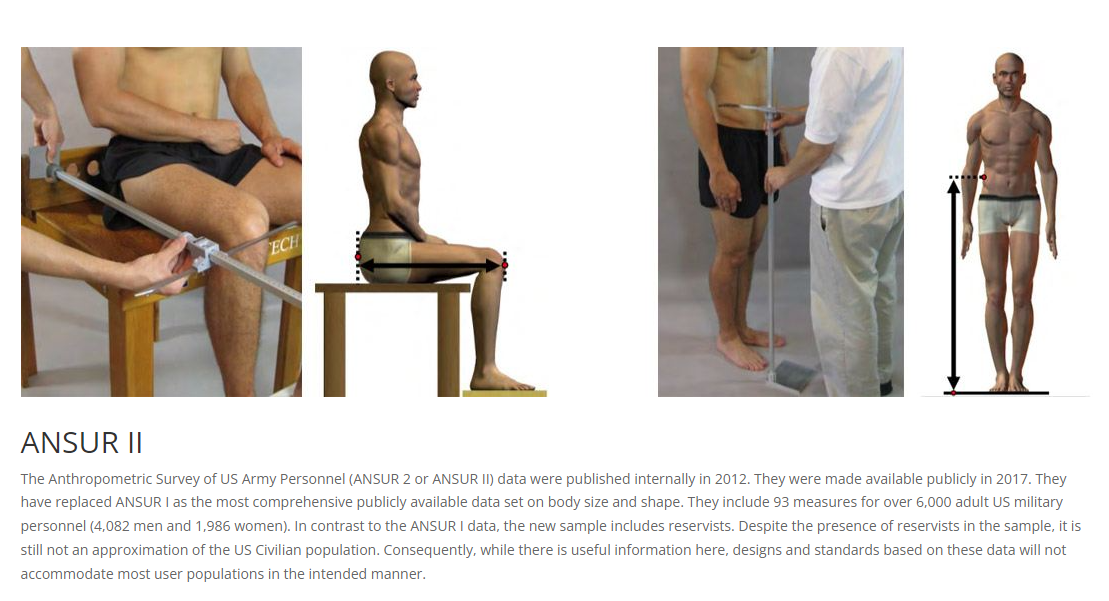

In [ ]:
data = pd.read_csv('C:\\Users\\Eugenio_Py\\Desktop\\Notebooks\\datasets\\ANSUR II MALE Public.csv', sep=",", header=0, index_col = 0, encoding = 'latin-1')
data.head()

In [ ]:
data.shape

In [ ]:
non_useful = ["Gender","Date","Installation","Component","Branch","PrimaryMOS","SubjectsBirthLocation","SubjectNumericRace","Ethnicity","DODRace","WritingPreference"
]

In [ ]:
X = data.drop(non_useful, axis = 1)

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
 from sklearn.manifold import TSNE

In [ ]:
m =  TSNE(learning_rate=50)

In [ ]:
tsne_features = m.fit_transform(X) # it takes a while (approx. 3 mins)!

In [ ]:
tsne_features[1:4,:]

In [ ]:
data['x'] = tsne_features[:,0]

In [ ]:
data['y'] = tsne_features[:,1]

In [ ]:
import seaborn as sns

sns.scatterplot(x="x",y="y", data = data);


In [ ]:
data.columns

BMI computation: BMI = (weight in pounds x 703) / (height in inches x height in inches).

In [ ]:
data['BMI'] = (data['Weightlbs']*703)/(data['Heightin']*data['Heightin'])

In [ ]:
data.BMI

In [ ]:
conditions = [
    (data['BMI'] <= 18.5),
    (data['BMI'] > 18.5) & (data['BMI'] <= 25),
    (data['BMI'] > 25) & (data['BMI'] <= 30),
    (data['BMI'] > 30)
    ]
choices = ['underweight', 'healthy', 'overweight', 'obesity']
data['BMI Class'] = np.select(conditions, choices)
print(data)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.scatterplot(x="x", y="y", hue = "BMI Class", data = data, palette="bright");
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="BMI Class");

It's a world full of colors...enjoy it! https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.scatterplot(x="x", y="y", hue = "Age", data = data, palette="coolwarm");
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
variables = X.columns
variables

### PCA comparison

In [ ]:
# Now we can also AUTOSCALE the data (autoscaling by column)
from sklearn.preprocessing import scale
Xaut = scale(X)
Xaut

In [ ]:
# Prepare the dataset for autoscaled data
data_autosc = pd.DataFrame(Xaut)
data_autosc.columns = X.columns
data_autosc.index = data.index
data_autosc.head()
data_autosc['Class'] = data['BMI Class']
data_autosc.head()

In [ ]:
# Plot with parallel coordinates plot (it takes a while, but it is horrible)
from matplotlib.pyplot import figure 
figure(figsize=(16, 6), dpi=120)
fig = pd.plotting.parallel_coordinates(data_autosc, 'Class', color=('red', 'blue', 'green', 'yellow'));
fig;

In [ ]:
# Build the PCA model (using sklearn library) - set 10 Principal Components (PCs) as default
from sklearn import decomposition
pca = decomposition.PCA(n_components=10)
pca

In [ ]:
# Apply the PCA model on X data (autoscaled)
Principal_components=pca.fit_transform(Xaut)

In [ ]:
# View the Scree plot
import matplotlib
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
# Print the cumulative explained variance (ratio)
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)
# Plot the cumulative explained variance
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.show()

In [ ]:
# Build a proper PCA model with n components
pca = decomposition.PCA(n_components=3)
Principal_components=pca.fit_transform(Xaut)

In [ ]:
# Scores - for graphs - add the Class and Y columns
scores = pd.DataFrame(data = Principal_components, columns = ['PC1', 'PC2', 'PC3'])
scores.index = data.index # name the row names as dataset 'data'
scores = pd.concat([data['Class'],scores], axis = 1) # concatenate function, along the column direction (axis=1)
print(scores)

In [ ]:
# Prepare the Loadings dataframe (loadings = pca.components_.T)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=data_autosc.columns[0:96])
loadings["Attributes"] = loadings.index
loadings

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
['underweight', 'healthy', 'overweight', 'obesity']
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Scores Plot", "Loadings Plot"))

fig.append_trace(go.Scatter(
    x=scores.query("Class == 'underweight'")['PC1'],
    y=scores.query("Class == 'underweight'")['PC2'],
    mode = 'markers',
    text = scores.index,
    marker=dict(size=10, color = 'orange'),
    name = 'Underweight',
    legendgroup = '1'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=scores.query("Class == 'healthy'")['PC1'],
    y=scores.query("Class == 'healthy'")['PC2'],
    text = scores.index,
    mode = 'markers',
    marker=dict(size=10, color = 'green'),
    name = 'Healthy',
    legendgroup = '1'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=scores.query("Class == 'overweight'")['PC1'],
    y=scores.query("Class == 'overweight'")['PC2'],
    text = scores.index,
    mode = 'markers',
    marker=dict(size=10, color = 'blue'),
    name = 'Overweight',
    legendgroup = '1'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=scores.query("Class == 'obesity'")['PC1'],
    y=scores.query("Class == 'obesity'")['PC2'],
    text = scores.index,
    mode = 'markers',
    marker=dict(size=10, color = 'red'),
    name = 'Obesity',
    legendgroup = '1'
), row=1, col=1)

fig.add_trace(go.Scatter(x = loadings['PC1'], 
                         y = loadings['PC2'],
                         mode = 'markers+text', # try "markers+text"
                         name = 'Loadings',
                         text = loadings.index,
                         textposition="top center",
                         textfont_size=8,
                         marker=dict(size=10, color = 'green')),
              row=1, col=2)

fig.update_layout(height=500, width=1000,
                  title_text="My PCA model on ANSUR II male data")

fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='Black')

fig.show()

#### What about ANSUR II female data?

### t-SNE on iris data

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
df = pd.read_csv('C:/Users/Eugenio_Py/Desktop/Notebooks/datasets/iris.csv', sep=";", header=0, index_col=0)
df

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df.iloc[:,0:4]) 

In [ ]:
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue="variety",
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data t-SNE projection") 

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue="sepal.length",
                data=df).set(title="Iris data t-SNE projection") 

### UMAP manifold

In [ ]:
pip install umap-learn

In [2]:
# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

# Skleran
from sklearn.datasets import load_digits # for MNIST data
from sklearn.model_selection import train_test_split # for splitting data into train and test samples

# UMAP dimensionality reduction
from umap import UMAP

Shape of digit images:  (1797, 8, 8)
Shape of X (main data):  (1797, 64)
Shape of y (true labels):  (1797,)


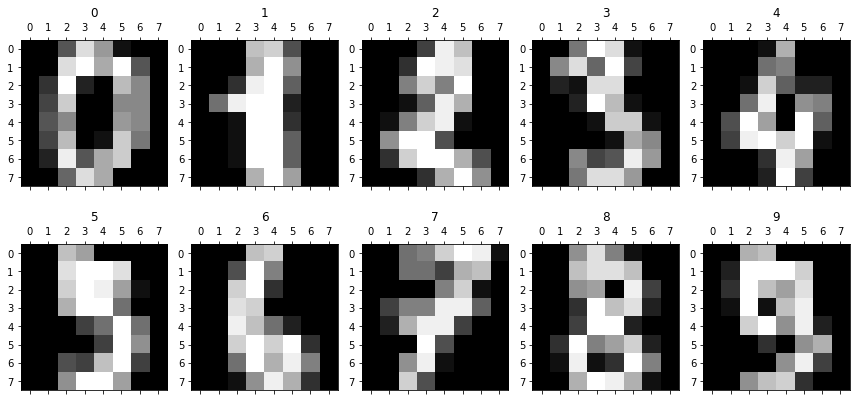

In [3]:
# Load digits data 
digits = load_digits()

# Load arrays containing digit data (64 pixels per image) and their true labels
X, y = load_digits(return_X_y=True)

# Some stats
print('Shape of digit images: ', digits.images.shape)
print('Shape of X (main data): ', X.shape)
print('Shape of y (true labels): ', y.shape)

# Display images of the first 10 digits
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
plt.gray() 
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(digits.images[n])
        axs[i,j].set(title=y[n])
        n=n+1
plt.show() 

Next, we will create a function for drawing 3D scatter plots that we can reuse multiple times to display results from UMAP dimensionality reduction.

In [4]:
def chart(X, y):
    #--------------------------------------------------------------------------#
    # This section is not mandatory as its purpose is to sort the data by label 
    # so, we can maintain consistent colors for digits across multiple graphs
    
    # Concatenate X and y arrays
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
    # Create a Pandas dataframe using the above array
    df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
    # Convert label data type from float to integer
    df['label'] = df['label'].astype(int)
    # Finally, sort the dataframe by label
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
    #--------------------------------------------------------------------------#
    
    # Create a 3D graph
    fig = px.scatter_3d(df, x='x', y='y', z='z', color=df['label'].astype(str), height=900, width=950)

    # Update chart looks
    fig.update_layout(title_text='UMAP',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    
    fig.show()

Now, we take the MNIST digit data that we have previously loaded into an array X. The shape of X (1797,64) tells us that we have 1,797 digits, each made up of 64 dimensions.
We will use UMAP to reduce the dimensionality from 64 down to 3. Please note that I have listed every hyperparameter available in UMAP with a short explanation of what they do.
In this example, we leave most of the hyperparameters set to their default values

In [5]:
# Configure UMAP hyperparameters
reducer = UMAP(n_neighbors=100, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=3, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=1000, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

# Fit and transform the data
X_transformed = reducer.fit_transform(X) # it takes a few mins

# Check the shape of the new data
print('Shape of X_transformed: ', X_transformed.shape)

Shape of X_transformed:  (1797, 3)


In [6]:
chart(X_transformed, y)

The results look pretty great, with a clear separation between the digit clusters. Interestingly digit 1 formed three distinct clusters, which can be explained by different variations of how people write digit 1:
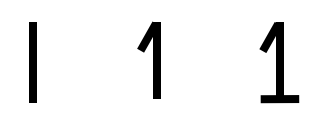

#### Supervised UMAP

In [7]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Configure UMAP hyperparameters - it takes a few mins
reducer2 = UMAP(n_neighbors=100, n_components=3, n_epochs=1000, 
                min_dist=0.5, local_connectivity=2, random_state=42,
              )

# Training on MNIST digits data - this time we also pass the true labels to a fit_transform method
X_train_res = reducer2.fit_transform(X_train, y_train)

# Apply on a test set
X_test_res = reducer2.transform(X_test)

# Print the shape of new arrays
print('Shape of X_train_res: ', X_train_res.shape)
print('Shape of X_test_res: ', X_test_res.shape)

Shape of X_train_res:  (1347, 3)
Shape of X_test_res:  (450, 3)


In [8]:
chart(X_train_res, y_train)

In [9]:
chart(X_test_res, y_test)

As you can see, the results are pretty good, with only a few digits placed in the wrong clusters. In particular, it looks like the algorithm struggled with digit 3, with a few examples located next to 7’s, 8’s, and 5’s.

### Kohonen maps - Self-Organizing Maps (SOM)

In [ ]:
#pip install minisom

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps

from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time

In [ ]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# load the data
data, target = load_breast_cancer(True)

In [ ]:
# X 
data

In [ ]:
# Shape of the data:
data.shape

For Self Organizing Maps, we only require X variables, we don't need Y or target variable. Hence, wouldn't be using it.

Though, the target variable (Y) can be used to understand if the output is matching with input or not.

In [ ]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 500
sigma = 1
learning_rate = 0.5

With x = 10 and y = 10 as the respective number of rows and number of columns (dimensions) there will be 10* 10 meaning 100 segments.

In [ ]:
# The number of features are:
data.shape[1]

In [ ]:
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=data.shape[1], sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(data)

# Training
som.train_random(data, iterations) #Training with 500 iterations

In [ ]:
# Returns the distance map from the weights:
som.distance_map()

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

In [ ]:
bone()
pcolor(som.distance_map().T) #Distance map as background
colorbar()

# Using different colors and markers for each label for identifying the patients with disease
markers= ['o', 's', 'D']
colors = ['r', 'g', 'b']

for cnt, xx in enumerate(data):
    w= som.winner(xx) # Getting the winner
    # Place a marker on winning position for the sample xx
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[target[cnt]],
         markeredgecolor = colors[target[cnt]],
         markerfacecolor = 'None',
         markersize = 12,
         markeredgewidth = 2)
# axis([0, som._weights.shape[0], 0, som._weights.shape[1]])
show()

Markers to distinguish the class:
    - Red are Class 0
    - Green are Class 1
- i is the index and x is the vector of each value and for each x first get the winning node
- The co-ordinates of the winning node are w[0] and w[1], 0.5 is added to center the marker
- s is a square and marker face color is the inside color of the marker